<a href="https://colab.research.google.com/github/robet31/RAPIGANTENG/blob/main/Tugas_2-EDA-DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Apakah ada tipe variabel yang kurang tepat?**

In [22]:
import pandas as pd

# Load dataset
df = pd.read_csv('tips.csv')

# Periksa tipe data asli
print("Tipe data asli:\n", df.dtypes)

# Ubah tipe data kategorikal
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['day'] = df['day'].astype('category')
df['time'] = df['time'].astype('category')

# Periksa tipe data setelah konversi
print("\nTipe data setelah konversi:\n", df.dtypes)

Tipe data asli:
 total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Tipe data setelah konversi:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


**2. Apakah data numerik cenderung berdistribusi normal?**

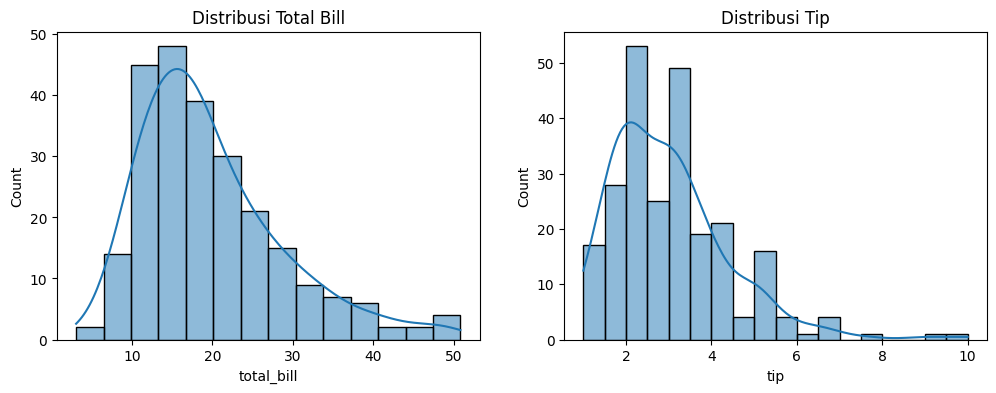

Uji normalitas total_bill: ShapiroResult(statistic=0.9197187941346584, pvalue=3.3245391868090786e-10)
Uji normalitas tip: ShapiroResult(statistic=0.8978110496018736, pvalue=8.200360128656659e-12)


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Histogram untuk total_bill dan tip
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['total_bill'], kde=True)
plt.title('Distribusi Total Bill')

plt.subplot(1, 2, 2)
sns.histplot(df['tip'], kde=True)
plt.title('Distribusi Tip')
plt.show()

# Uji Shapiro-Wilk
print("Uji normalitas total_bill:", stats.shapiro(df['total_bill']))
print("Uji normalitas tip:", stats.shapiro(df['tip']))

**3. Apakah ada outlier, noise, missing values, atau duplikasi?**

In [24]:
# Missing values
print("Jumlah missing values:\n", df.isnull().sum())

# Duplikasi
print("\nJumlah baris duplikat:", df.duplicated().sum())

# Outlier (IQR method)
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['tip'] < Q1 - 1.5*IQR) | (df['tip'] > Q3 + 1.5*IQR)]
print("\nJumlah outlier pada kolom 'tip':", len(outliers))

Jumlah missing values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Jumlah baris duplikat: 1

Jumlah outlier pada kolom 'tip': 9


**4. Apakah proporsi pelanggan pria dan wanita seimbang?**

sex
Male      157
Female     87
Name: count, dtype: int64


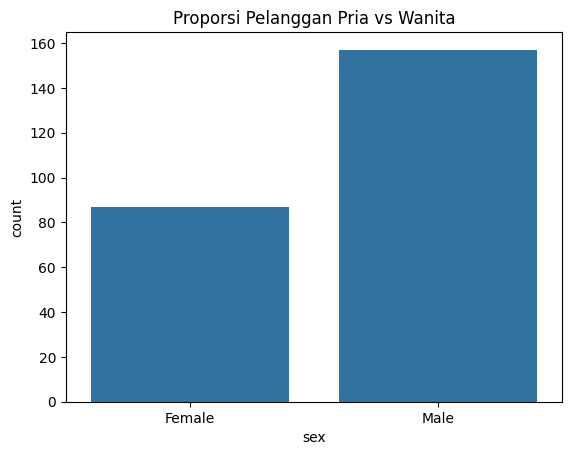

In [25]:
# Proporsi pelanggan berdasarkan jenis kelamin
print(df['sex'].value_counts())

# Visualisasi
sns.countplot(x='sex', data=df)
plt.title('Proporsi Pelanggan Pria vs Wanita')
plt.show()

**5. Apakah pria atau wanita cenderung memberi tip lebih besar?**

<ipython-input-26-002b4acc2788>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('sex')['tip'].mean())


sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


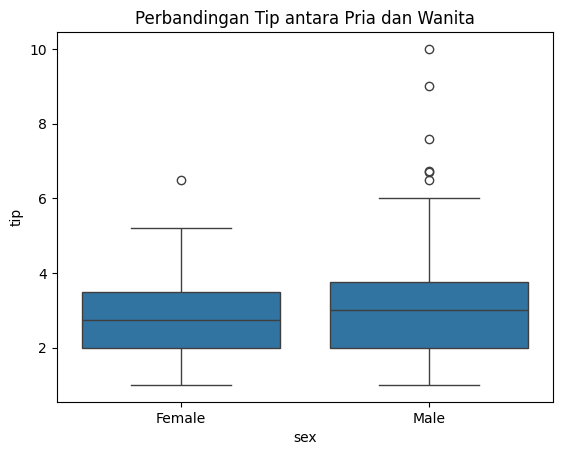

In [26]:
# Rata-rata tip berdasarkan jenis kelamin
print(df.groupby('sex')['tip'].mean())

# Visualisasi
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Perbandingan Tip antara Pria dan Wanita')
plt.show()

**6. Apakah ada kecenderungan tip lebih besar pada hari tertentu?**

<ipython-input-27-f86f130cac72>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('day')['tip'].mean().sort_values(ascending=False))


day
Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
Name: tip, dtype: float64


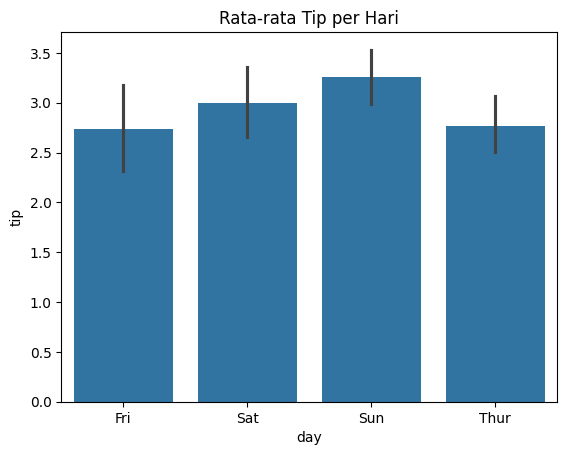

In [27]:
# Rata-rata tip berdasarkan hari
print(df.groupby('day')['tip'].mean().sort_values(ascending=False))

# Visualisasi
sns.barplot(x='day', y='tip', data=df)
plt.title('Rata-rata Tip per Hari')
plt.show()

**7. Apakah pelanggan perokok cenderung memberi tip lebih besar?**

<ipython-input-28-cf875c73f00e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('smoker')['tip'].mean())


smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


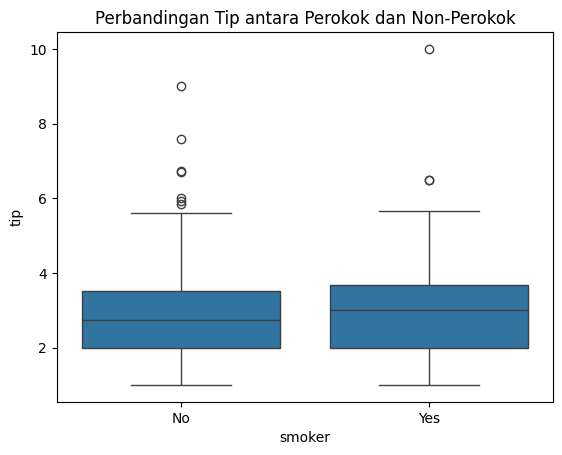

In [28]:
# Rata-rata tip berdasarkan perokok
print(df.groupby('smoker')['tip'].mean())

# Visualisasi
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Perbandingan Tip antara Perokok dan Non-Perokok')
plt.show()

**8. Apakah pola di nomor 5 dan 7 dipengaruhi hari?**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


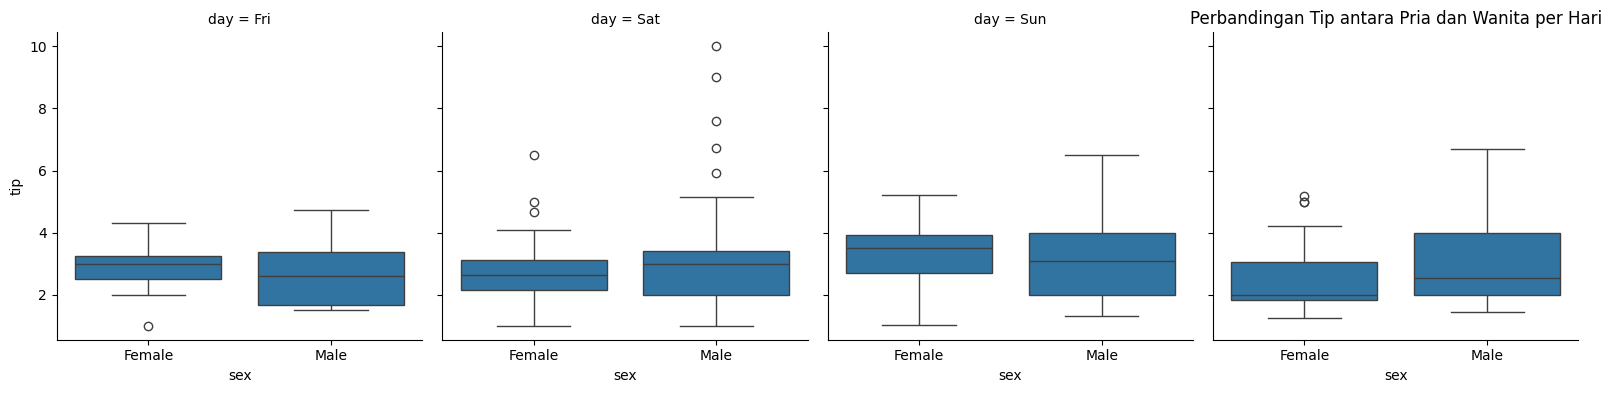

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


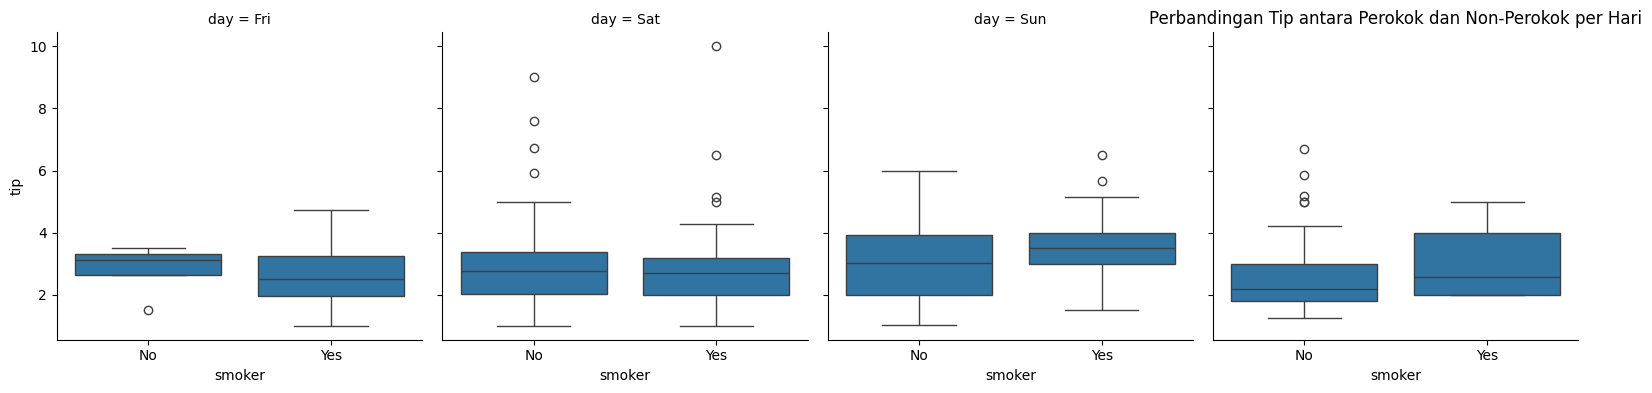

In [29]:
# Interaksi antara day, sex, dan tip
g = sns.FacetGrid(df, col='day', height=4)
g.map(sns.boxplot, 'sex', 'tip')
g.add_legend()
plt.title('Perbandingan Tip antara Pria dan Wanita per Hari')
plt.show()

# Interaksi antara day, smoker, dan tip
g = sns.FacetGrid(df, col='day', height=4)
g.map(sns.boxplot, 'smoker', 'tip')
g.add_legend()
plt.title('Perbandingan Tip antara Perokok dan Non-Perokok per Hari')
plt.show()

**9. Pola apa yang dapat ditemukan?**

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


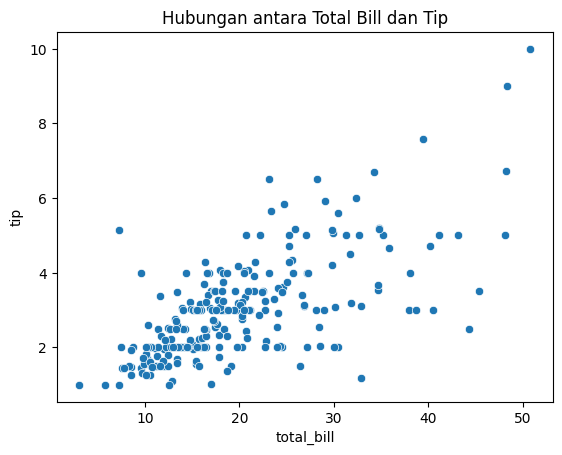

In [30]:
# Korelasi antara total_bill dan tip
print(df[['total_bill', 'tip']].corr())

# Scatter plot
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Hubungan antara Total Bill dan Tip')
plt.show()

**10. Saran untuk pemilik restoran:**

**11. Skills/Kompetensi yang dibutuhkan:**